In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection

In [2]:
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_pred = os.path.join(pth_data, 'modeling', 'predict')
pth_traj = os.path.join(pth_data, 'trajectories')
pth_out = os.path.join(pth, 'figures', 'modeling')

In [3]:
df = pd.read_csv(os.path.join(pth_data, 'summary.csv'), index_col = 0)
df

,Name,Study,Species,Trajectory,Dataset,Features,Training,Trajectory Embedding,Age,Description
Source,,,,,,,,,,
GSE136689,Splanchnic Mesoderm,"Han et al., 2020",mmusculus,True,True,True,True,X_umap,E8.5-9.5,Foregut organogenesis dataset showing interact...
GSE162534,Primitive Streak,"Scheibner et al., 2021",mmusculus,True,True,True,True,X_umap,Early-Late Streak,Gastrulation dataset analyzing EMT programs du...
GSE201257,Schwann Cell Precursor,"Kastriti et al, 2022",mmusculus,True,True,True,False,X_umap,E9.5-Adult,Neural crest cell atlas describing diversifica...
GSE229103,Neuromesodermal Progenitor,"Jin et al., 2025",mmusculus,True,True,True,True,X_umap,E8.5,Developmental dataset describing bipotent neur...
HCAEmbryonicHindlimb,Embryonic Hindlimb,"Zhang et al., 2024",hsapiens,True,True,True,True,X_draw_graph_fa,PCW5-9,Embryonic hindlimb atlas focusing on spatial a...
rRNAModifications,Cranial Neural Crest,Poverennaya et al.,mmusculus,True,True,True,True,X_umap,E8.5-10.5,Neural crest cell dataset showing the bifurcat...
CCCA,Curated Cancer Cell Atlas,"Tyler et al., 2025",hsapiens,False,True,False,False,NaN,Primary & Metastatic,Cancer atlas containing 70+ curated single-cel...
EMTHallmark,EMT Hallmark,"Liberzon et al., 2015",hsapiens,False,False,True,NaN,NaN,NaN,Genes defining epithelial-mesenchymal transiti...
TCGA,The Cancer Genome Atlas,"TCGA Network, 2013",hsapiens,False,True,False,False,NaN,Primary & Metastatic,The Cancer Genome Atlas dataset of >40 cancer ...


In [4]:
adata = sc.read_h5ad(os.path.join(pth_pred, 'development.h5ad'))
adata

AnnData object with n_obs × n_vars = 143369 × 856
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype', 'trajectory', 't', 'training', 'validation', 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'plates', 'devtime', 'location', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden', 'total_counts_ribo', 'pct_counts_ribo', 'T+ Sox2+', 'batch', 'percent_mito', 'n_counts', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'S_score', 'G2M_score', 'phase', 'leiden_R', 'celltype_original', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters', 'age', 'RNA_snn_res.0.5', 'ident', 'velocity_self_transition', 'source', 'weight_celltype', 'weight_source', 'weight', 'latent_z'
    obsm: 'X_diff', 'X_draw_gr

In [15]:
vmin, vmax, cmap = 0, 1, 'vanimo'

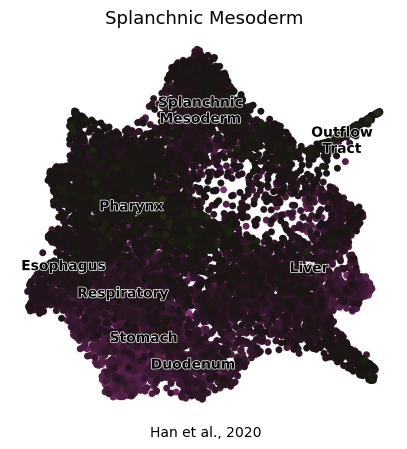

In [16]:
geo = 'GSE136689'
adata_plt = adata[adata.obs.source == geo].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.embedding(adata_plt, 'X_draw_graph_fa', color = 'latent_z',
                size = 100, cmap = cmap, vmin = vmin, vmax = vmax,
                frameon = False, colorbar_loc = None, show = False,
                ax = ax)
sc.pl.embedding(adata_plt, 'X_draw_graph_fa', color = 'celltype',
                size = 100, alpha = 0, legend_loc = 'on data',
                na_in_legend = False, legend_fontoutline = 1,
                frameon = False, show = False, ax = ax)

label_dict = {
    'Splanchnic Mesoderm' : 'Splanchnic\nMesoderm',
    'Outflow Tract'       : 'Outflow\nTract',
    'nan'                 : ''}

pos_dict = {
    'Splanchnic Mesoderm' : (0, 300),
    'Respiratory'         : (0, -300),
    'Outflow Tract'       : (5000, 800)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(df.loc[geo].Name, size = 13)
ax.text(.36, -.05, df.loc[geo].Study, transform = ax.transAxes)
fn = os.path.join(pth_out, 'processed', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


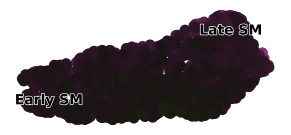

In [17]:
adata_traj = sc.read_h5ad(os.path.join(pth_traj, f'{geo}.h5ad'))
adata_traj.obs['latent_z'] = adata_plt[adata_traj.obs_names].obs.latent_z.copy()

fig, ax = plt.subplots(1, 1, figsize = (3.5, 1.5))
sc.pl.umap(adata_traj, color = 'latent_z',
           cmap = cmap, vmin = vmin, vmax = vmax,
           size = 250, colorbar_loc = None,
           frameon = False, show = False, ax = ax)
scf.pl.milestones(adata_traj, basis = 'umap',
                  annotate = True, alpha = 0,
                  show = False, ax = ax)
ax.set_title('')
fn = os.path.join(pth_out, 'trajectories', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

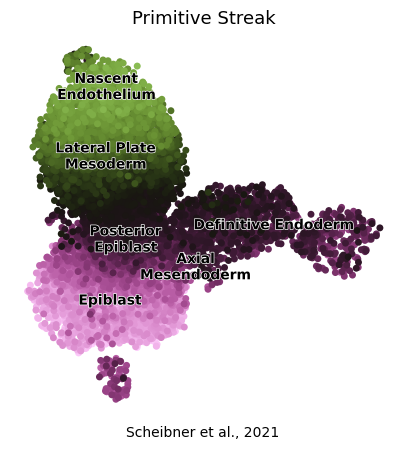

In [18]:
geo = 'GSE162534'
adata_plt = adata[adata.obs.source == geo].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 100,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'celltype', size = 100,
           alpha = 0, legend_loc = 'on data',
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
ax.invert_yaxis()

label_dict = {
    'Nascent Endothelium'    : 'Nascent\nEndothelium',
    'Lateral Plate Mesoderm' : 'Lateral Plate\nMesoderm',
    'Posterior Epiblast'     : 'Posterior\nEpiblast',
    'Axial Mesendoderm'      : 'Axial\nMesendoderm',
    'nan'                    : ''}

pos_dict = {
    'Axial Mesendoderm'      : (.1, .2),
    'Posterior Epiblast'     : (-.2, 0),
    'Definitive Endoderm'    : (.5, 0)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(df.loc[geo].Name, size = 13)
ax.text(.3, -.05, df.loc[geo].Study, transform = ax.transAxes)
fn = os.path.join(pth_out, 'processed', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


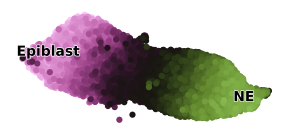

In [19]:
adata_traj = sc.read_h5ad(os.path.join(pth_traj, f'{geo}.h5ad'))
adata_traj = adata_traj[adata_traj.obs_names.isin(adata_plt.obs_names)].copy()
adata_traj.obs['latent_z'] = adata_plt[adata_traj.obs_names].obs.latent_z.copy()

fig, ax = plt.subplots(1, 1, figsize = (3.5, 1.5))
sc.pl.umap(adata_traj, color = 'latent_z', size = 80,
           cmap = cmap, vmin = vmin, vmax = vmax,
           colorbar_loc = None, frameon = False,
           show = False, ax = ax)
scf.pl.milestones(adata_traj, basis = 'umap',
                  annotate = True, alpha = 0,
                  show = False, ax = ax)
ax.invert_xaxis(); ax.set_title('')

label_dict = {
    'Lateral Plate Mesoderm' : 'NE',
    'Posterior Epiblast'     : 'Epiblast'}

for label in ax.texts:
    _label_ = label.get_text()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])

fn = os.path.join(pth_out, 'trajectories', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

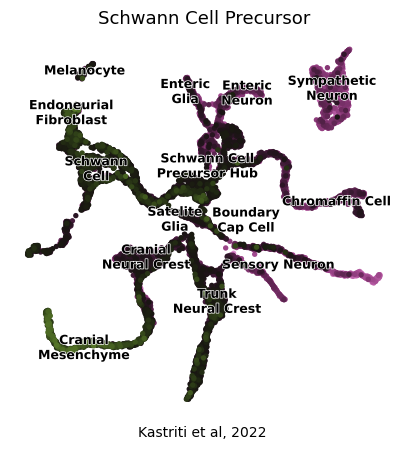

In [20]:
geo = 'GSE201257'
adata_plt = adata[adata.obs.source == geo].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 60,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'celltype', size = 60,
           alpha = 0, legend_fontsize = 9,
           legend_loc = 'on data', na_in_legend = False,
           legend_fontoutline = 1, frameon = False,
           show = False, ax = ax)

label_dict = {
    'Endoneurial Fibroblast'     : 'Endoneurial\nFibroblast',
    'Sympathetic Neuron'         : 'Sympathetic\nNeuron',
    'Enteric Neuron'             : 'Enteric\nNeuron',
    'Enteric Glia'               : 'Enteric\nGlia',
    'Schwann Cell'               : 'Schwann\nCell',
    'Schwann Cell Precursor Hub' : 'Schwann Cell\nPrecursor Hub',
    'Cranial Neural Crest'       : 'Cranial\nNeural Crest',
    'Trunk Neural Crest'         : 'Trunk\nNeural Crest',
    'Cranial Mesenchyme'         : 'Cranial\nMesenchyme',
    'Satelite Glia'              : 'Satelite\nGlia',
    'Boundary Cap Cell'          : 'Boundary\nCap Cell',
    'nan'                        : ''}

pos_dict = {
    'Enteric Neuron'     : (1, 0),
    'Enteric Glia'       : (-.5, 0),
    'Schwann Cell'       : (.75, .75),
    'Trunk Neural Crest' : (1, .5),
    'Cranial Mesenchyme' : (1.75, -.5),
    'Satelite Glia'      : (-1.5, 0),
    'Boundary Cap Cell'  : (3, 0)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(df.loc[geo].Name, size = 13)
ax.text(.33, -.05, df.loc[geo].Study, transform = ax.transAxes)
fn = os.path.join(pth_out, 'processed', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


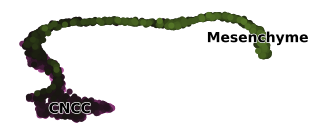

In [21]:
adata_traj = sc.read_h5ad(os.path.join(pth_traj, f'{geo}.h5ad'))
adata_traj.obs['latent_z'] = adata_plt[adata_traj.obs_names].obs.latent_z.copy()

fig, ax = plt.subplots(1, 1, figsize = (3.5, 1.5))
sc.pl.umap(adata_traj, color = 'latent_z', size = 80,
           cmap = cmap, vmin = vmin, vmax = vmax,
           colorbar_loc = None, frameon = False,
           show = False, ax = ax)
scf.pl.milestones(adata_traj, basis = 'umap',
                  annotate = True, alpha = 0,
                  show = False, ax = ax)
ax.invert_xaxis(); ax.invert_yaxis(); ax.set_title('')

label_dict = {'Neural Crest' : 'CNCC'}
pos_dict = {'Neural Crest' : (.6, 0)}
for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

fn = os.path.join(pth_out, 'trajectories', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

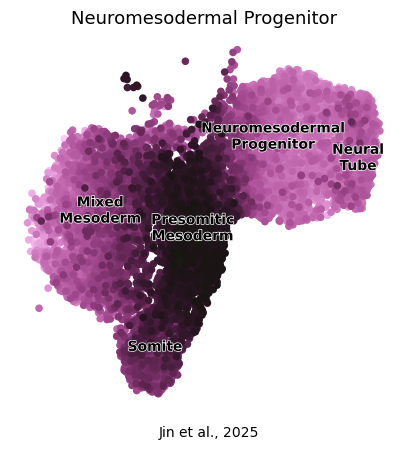

In [22]:
geo = 'GSE229103'
adata_plt = adata[adata.obs.source == geo].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 120,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'celltype', size = 120,
           alpha = 0, legend_loc = 'on data',
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
ax.set_ylim(top = ax.get_ylim()[1] - 4)

label_dict = {
    'Neuromesodermal Progenitor' : 'Neuromesodermal\nProgenitor',
    'Neural Tube'                : 'Neural\nTube',
    'Presomitic Mesoderm'        : 'Presomitic\nMesoderm',
    'Mixed Mesoderm'             : 'Mixed\nMesoderm'}

pos_dict = {
    'Neuromesodermal Progenitor' : (-.25, .25),
    'Neural Tube'                : (.25, -.25)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(df.loc[geo].Name, size = 13)
ax.text(.385, -.05, df.loc[geo].Study, transform = ax.transAxes)
fn = os.path.join(pth_out, 'processed', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

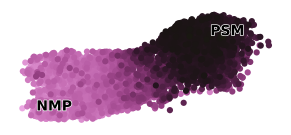

In [23]:
adata_traj = sc.read_h5ad(os.path.join(pth_traj, f'{geo}.h5ad'))
adata_traj = adata_traj[adata_traj.obs_names.isin(adata_plt.obs_names)].copy()
adata_traj.obs['latent_z'] = adata_plt[adata_traj.obs_names].obs.latent_z.copy()

fig, ax = plt.subplots(1, 1, figsize = (3.5, 1.5))
sc.pl.umap(adata_traj, dimensions = [1, 0],
           color = 'latent_z', size = 80,
           cmap = cmap, vmin = vmin, vmax = vmax,
           colorbar_loc = None, frameon = False,
           show = False, ax = ax)
sc.pl.umap(adata_traj, dimensions = [1, 0],
           color = 'milestones', alpha = 0,
           legend_loc = 'on data', legend_fontoutline = 1,
           show = False, ax = ax)
ax.invert_xaxis(); ax.set_title('')

label_dict = {
    'Presomitic Mesoderm'        : 'PSM',
    'Neuromesodermal Progenitor' : 'NMP'}

pos_dict = {
    'Neuromesodermal Progenitor' : (1.5, -1.75),
    'Presomitic Mesoderm'        : (-1.33, 1.75)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

fn = os.path.join(pth_out, 'trajectories', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

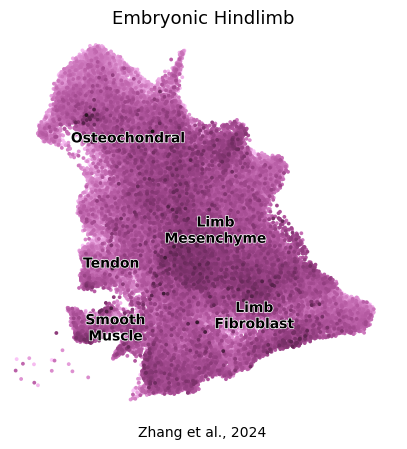

In [24]:
geo = 'HCAEmbryonicHindlimb'
adata_plt = adata[adata.obs.source == geo].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 30,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'celltype', size = 30,
           alpha = 0, legend_loc = 'on data',
           legend_fontoutline = 1, frameon = False,
           show = False, ax = ax)
ylim = ax.get_ylim()
ax.set_xlim(left = ax.get_xlim()[0] + 6)
ax.set_ylim(ylim[0] + 1, ylim[1] - 1.5)

label_dict = {
    'Limb Mesenchyme' : 'Limb\nMesenchyme',
    'Limb Fibroblast' : 'Limb\nFibroblast',
    'Smooth Muscle'   : 'Smooth\nMuscle'}

pos_dict = {
    'Limb Mesenchyme' : (.8, .2),
    'Limb Fibroblast' : (1, 0)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

for coll in ax.collections:
    if isinstance(coll, PathCollection):
        coll.set_rasterized(True)

ax.set_title(df.loc[geo].Name, size = 13)
ax.text(.33, -.05, df.loc[geo].Study, transform = ax.transAxes)
fn = os.path.join(pth_out, 'processed', f'{geo}.pdf')
plt.savefig(fn, dpi = 1200, bbox_inches = 'tight')

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


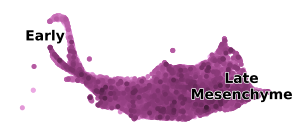

In [25]:
adata_traj = sc.read_h5ad(os.path.join(pth_traj, f'{geo}.h5ad'))
adata_traj.obs['latent_z'] = adata_plt[adata_traj.obs_names].obs.latent_z.copy()

fig, ax = plt.subplots(1, 1, figsize = (3.5, 1.5))
sc.pl.draw_graph(adata_traj, color = 'latent_z',
                 cmap = cmap, vmin = vmin, vmax = vmax,
                 size = 50, colorbar_loc = None,
                 frameon = False, show = False, ax = ax)
scf.pl.milestones(adata_traj, basis = 'draw_graph_fa',
                  annotate = True, alpha = 0,
                  show = False, ax = ax)
ax.invert_xaxis(); ax.invert_yaxis(); ax.set_title('')
ax.set_ylim(top = ax.get_ylim()[1] + 5)

label_dict = {
    'Early Mesenchyme' : 'Early',
    'Late Mesenchyme'  : 'Late\nMesenchyme'}

pos_dict = {
    'Early Mesenchyme' : (5, 6)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

fn = os.path.join(pth_out, 'trajectories', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

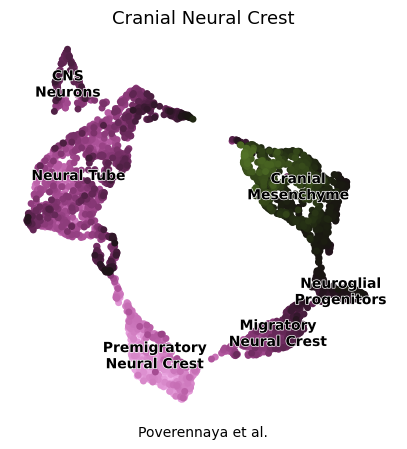

In [26]:
geo = 'rRNAModifications'
adata_plt = adata[adata.obs.source == geo].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 100,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'celltype', size = 100,
           alpha = 0, legend_loc = 'on data',
           legend_fontoutline = 1, frameon = False,
           show = False, ax = ax)
ax.set_xlim(right = ax.get_xlim()[1] + 1)

label_dict = {
    'CNS Neurons'               : 'CNS\nNeurons',
    'Premigratory Neural Crest' : 'Premigratory\nNeural Crest',
    'Migratory Neural Crest'    : 'Migratory\nNeural Crest',
    'Neuroglial Progenitors'    : 'Neuroglial\nProgenitors',
    'Cranial Mesenchyme'        : 'Cranial\nMesenchyme'}

pos_dict = {
    'CNS Neurons'               : (.15, 0),
    'Neural Tube'               : (-1, 0),
    'Premigratory Neural Crest' : (.15, .5)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(df.loc[geo].Name, size = 13)
ax.text(.33, -.05, df.loc[geo].Study, transform = ax.transAxes)
fn = os.path.join(pth_out, 'processed', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


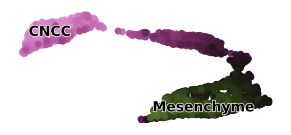

In [27]:
adata_traj = sc.read_h5ad(os.path.join(pth_traj, f'{geo}.h5ad'))
adata_traj = adata_traj[adata_traj.obs_names.isin(adata_plt.obs_names)].copy()
adata_traj.obs['latent_z'] = adata_plt[adata_traj.obs_names].obs.latent_z.copy()

fig, ax = plt.subplots(1, 1, figsize = (3.5, 1.5))
sc.pl.umap(adata_traj, color = 'latent_z',
           cmap = cmap, vmin = vmin, vmax = vmax,
           size = 100, colorbar_loc = None,
           frameon = False, show = False, ax = ax)
scf.pl.milestones(adata_traj, basis = 'umap',
                  annotate = True, alpha = 0,
                  show = False, ax = ax)
ax.invert_yaxis(); ax.set_title('')

label_dict = {
    'migr_ncc'   : '',
    'mes_fork'   : '',
    'mes2'       : '',
    'neuroglial' : '',
    'root'       : 'CNCC',
    'mes1'       : 'Mesenchyme'}

pos_dict = {
    'root' : (.75, -1.25),
    'mes1' : (1.75, -.25)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

fn = os.path.join(pth_out, 'trajectories', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')